In [1]:
# Configure tensorflow
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
print(f"Num of GPUs available: {len(gpus)}")
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except:
    pass

Num of GPUs available: 1


In [2]:
#Import all necessary libraries
!pip install pandas scikit-learn
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

%matplotlib inline

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
df = pd.read_csv("housepricedata.csv")

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
# Split the dataset
X = dataset[:,0:10]
y = dataset[:,10]

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
# Split the data into training and testing sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

# Split the testing set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [11]:
# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
# Compile the model
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.2448 - accuracy: 0.6561 - val_loss: 0.2440 - val_accuracy: 0.6621
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.6727 - val_loss: 0.2430 - val_accuracy: 0.6895
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.6782 - val_loss: 0.2419 - val_accuracy: 0.6941
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.6910 - val_loss: 0.2410 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.7024 - val_loss: 0.2401 - val_accuracy: 0.6849
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.7126 - val_loss: 0.2392 - val_accuracy: 0.6895
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.7035 - val_loss: 0.2383 - val_accuracy: 0.6941
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.8405 - val_loss: 0.1659 - val_accuracy: 0.8356
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.8624 - val_loss: 0.1644 - val_accuracy: 0.8356
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.8317 - val_loss: 0.1629 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.8561 - val_loss: 0.1613 - val_accuracy: 0.8402
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.8416 - val_loss: 0.1599 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.8513 - val_loss: 0.1584 - val_accuracy: 0.8493
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.8548 - val_loss: 0.1569 - val_accuracy: 0.8447
Epoch 

In [14]:
# Test the model
model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.8447


0.844748854637146

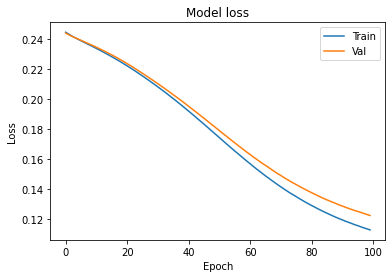

In [15]:
# Visualization of the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

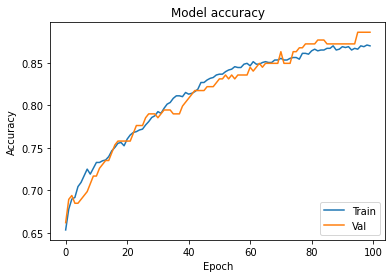

In [16]:
# Visualization of model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
# Create a second model
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,015,001
Trainable params: 3,015,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [20]:
history_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2054 - accuracy: 0.6394 - val_loss: 0.1166 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.8632 - val_loss: 0.0958 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.8885 - val_loss: 0.1273 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.8767 - val_loss: 0.0865 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9100 - val_loss: 0.0819 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.8808 - val_loss: 0.0938 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.8591 - val_loss: 0.0837 - val_accuracy: 0.8676
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9519 - val_loss: 0.0916 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9532 - val_loss: 0.0805 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9235 - val_loss: 0.0924 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9454 - val_loss: 0.0894 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9227 - val_loss: 0.0969 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9449 - val_loss: 0.0830 - val_accuracy: 0.8858
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9396 - val_loss: 0.0875 - val_accuracy: 0.8813
Epoch 

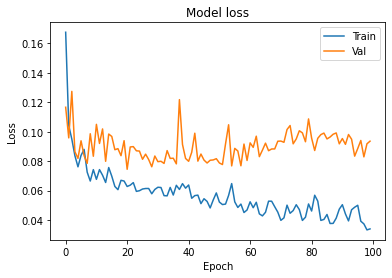

In [21]:
# Visualize the loss function
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

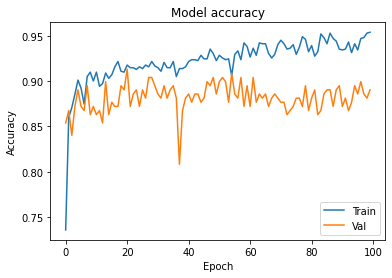

In [22]:
# Visualize the accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [24]:
model_3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [25]:
history_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 20.6111 - accuracy: 0.5348 - val_loss: 3.4478 - val_accuracy: 0.5936
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0851 - accuracy: 0.5357 - val_loss: 0.3554 - val_accuracy: 0.5114
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.5042 - val_loss: 0.2528 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.4818 - val_loss: 0.2502 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4874 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.4964 - val_loss: 0.2500 - val_accuracy: 0.5114
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.5061 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.4948 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.5012 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.4915 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5236 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5147 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5024 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.5094 - val_loss: 0.2500 - val_accuracy: 0.4886
Epoch 

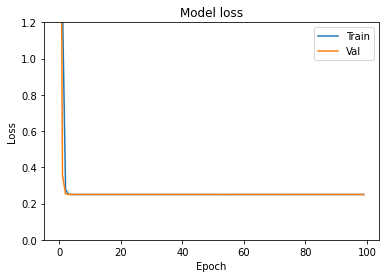

In [26]:
# Visualize the loss of the model
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

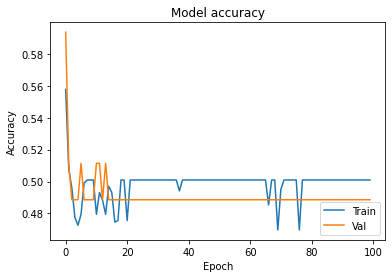

In [27]:
# Visualize the accuracy of the model
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()